In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./Data/HW2_data/international_matches.csv')
df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


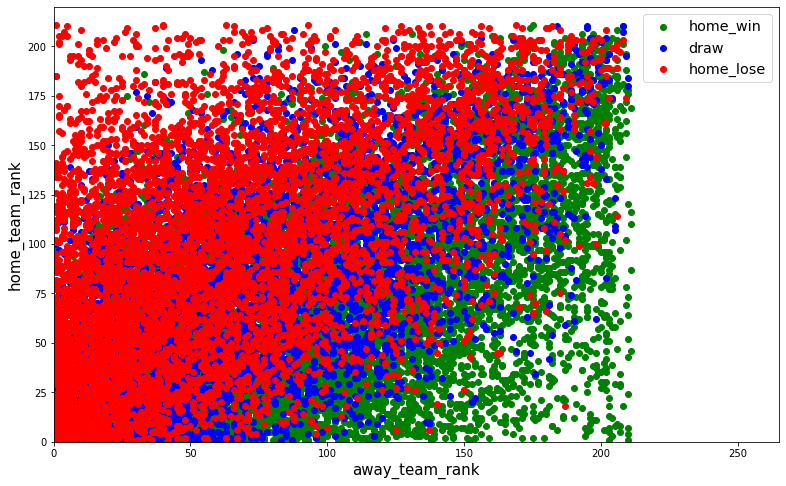

In [3]:
h_rank = df['home_team_fifa_rank']
a_rank = df['away_team_fifa_rank']
rank_win = df.loc[df['home_team_score'] > df['away_team_score'], ['home_team_fifa_rank', 'away_team_fifa_rank']]
rank_eq = df.loc[df['home_team_score'] == df['away_team_score'], ['home_team_fifa_rank', 'away_team_fifa_rank']]
rank_lose = df.loc[df['home_team_score'] < df['away_team_score'], ['home_team_fifa_rank', 'away_team_fifa_rank']]
h1 = rank_win['home_team_fifa_rank'].values; a1 = rank_win['away_team_fifa_rank'].values;
h2 = rank_eq['home_team_fifa_rank'].values; a2 = rank_eq['away_team_fifa_rank'].values;
h3 = rank_lose['home_team_fifa_rank'].values; a3 = rank_lose['away_team_fifa_rank'].values;
plt.figure(1, figsize= (13, 8))
plt.scatter(a1, h1, c = 'green')
plt.scatter(a2, h2, c = 'blue')
plt.scatter(a3, h3, c = 'red')
plt.xlabel('away_team_rank', size = 15)
plt.ylabel('home_team_rank', size = 15)
plt.xlim((0, 265))
plt.ylim((0, 220))
plt.legend(('home_win', 'draw', 'home_lose'), loc = 'upper right', fontsize = 'x-large')

In [4]:
df_clean = df.drop(df[(df['home_team_total_fifa_points']==0) | (df['away_team_total_fifa_points']==0)].index)
print(len(df_clean), len(df))
df_clean.reset_index(drop = True, inplace=True)
df_clean

9594 23921


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,2011-08-24,Guyana,India,South America,Asia,114,158,260,112,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-08-24,Thailand,Singapore,Asia,Asia,120,129,245,208,0,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-08-25,United Arab Emirates,Qatar,Asia,Asia,108,88,298,364,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-08-26,Bahrain,Sudan,Asia,Africa,101,98,325,328,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-08-27,Angola,Congo DR,Africa,Africa,96,127,338,221,1,...,No,Lose,70.0,NaN,NaN,69.7,61.5,69.2,69.7,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9589,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9590,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
9591,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
9592,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [5]:
from torchvision import transforms
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, df, feat_col, lable_col, transform = None):
        self.df = df
        self.feat_col = feat_col
        self.lable_col = lable_col
        self.transform = transform 
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        feat_vec = self.df[self.feat_col].iloc[idx, :].values
        lab_vec0 = self.df[self.lable_col].iloc[idx]
        if lab_vec0 == 'Win':
            lable = np.array([0])
        elif lab_vec0 == 'Draw':
            lable = np.array([1])
        else:
            lable = np.array([2])
        if self.transform:
            feat_vec = self.transform(feat_vec)
            lab_vec = torch.tensor(lable, dtype = torch.long)
        return feat_vec, lab_vec

In [6]:
from torch.utils.data import random_split
feat_cols = ['home_team_total_fifa_points', 'home_team_fifa_rank', 'away_team_total_fifa_points', 'away_team_fifa_rank']
lable_col = 'home_team_result'
Data = MyDataset(df_clean, feat_cols, lable_col, transforms.transforms.Tensor)
SplitData = random_split(Data, [0.75, 0.25])
Train = SplitData[0]
Test = SplitData[1]
print(len(Data), len(Train), len(Test))

9594 7196 2398


<AxesSubplot:>

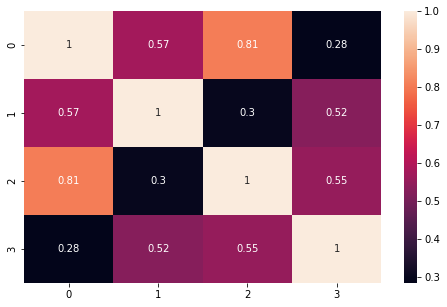

In [7]:
import seaborn
X = df_clean[feat_cols].iloc[0:, :].values
Xc = X - np.mean(X, axis = 0)
Xc = Xc/np.linalg.norm(Xc, axis = 0)
Corr = Xc.T @ Xc
plt.figure(1, figsize=(8, 5))
seaborn.heatmap(np.abs(Corr), annot = True)

In [8]:
import torch.nn as nn
class NeNet(nn.Module):
    def __init__(self):
        super(NeNet, self).__init__()
        self.Linear_Relu = nn.Sequential(
        nn.Linear(in_features=4, out_features=10), 
        nn.ReLU(), 
        nn.Linear(in_features=10, out_features=20),
        nn.ReLU(), 
        nn.Linear(in_features=20, out_features=8),
        nn.ReLU(),
        nn.Linear(in_features=8, out_features=3))
        self.softmax = nn.Softmax(dim = 1)
    def forward(self, X):
        logits = self.Linear_Relu(X)
        return logits
        

In [9]:
from torch.utils.data import DataLoader
batch_size = 64
train_dataloader = DataLoader(Train, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(Test, batch_size = batch_size, shuffle = True)
model = NeNet()

In [10]:
Lr = 1e-2
epoch = 10
optimizer = torch.optim.Adam(params= model.parameters(), lr=Lr)
loss_func = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available else 'cpu'
model = model.to(device)

In [11]:
def train_loop(model, dataloader):
   LD = len(dataloader.dataset)
   for i, (X, y) in enumerate(dataloader):
     y = y.squeeze()
     X, y = X.to(device), y.to(device)
     ypred = model(X)
     loss = loss_func(ypred, y)
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()
     if i % 40 == 0:
       print(f'loss = {loss.item():5f}     [{i*batch_size:5}\{LD:5}]')
def test_loop(model, dataloader):
   LD = len(dataloader.dataset)
   LB = len(dataloader)
   loss = 0
   Accu = 0
   for i, (X, y) in enumerate(dataloader):
     X, y = X.to(device), y.to(device)
     y = y.squeeze()
     with torch.no_grad():
        ypred = model(X)
        loss += loss_func(ypred, y)
        Accu += (torch.argmax(ypred, dim = 1)==y).type(torch.float).sum().item()
   print(f'Test Loss = {loss.item()/LB:5f}  ,  Accuracy = {100*Accu/LD:2f}%')

In [12]:
model.train()
for k in range(epoch):
    print(f'\nEpoch: {k}-----------------------------------------')
    train_loop(model, train_dataloader)
    #model.eval()
    test_loop(model, test_dataloader)


Epoch: 0-----------------------------------------
loss = 10.522782     [    0\ 7196]
loss = 1.052373     [ 2560\ 7196]
loss = 1.014693     [ 5120\ 7196]
Test Loss = 0.957366  ,  Accuracy = 55.796497%

Epoch: 1-----------------------------------------
loss = 1.069449     [    0\ 7196]
loss = 0.877192     [ 2560\ 7196]
loss = 0.942491     [ 5120\ 7196]
Test Loss = 0.953172  ,  Accuracy = 55.879900%

Epoch: 2-----------------------------------------
loss = 0.982305     [    0\ 7196]
loss = 0.871593     [ 2560\ 7196]
loss = 0.873648     [ 5120\ 7196]
Test Loss = 0.962015  ,  Accuracy = 55.796497%

Epoch: 3-----------------------------------------
loss = 0.852130     [    0\ 7196]
loss = 0.971386     [ 2560\ 7196]
loss = 0.835593     [ 5120\ 7196]
Test Loss = 0.951844  ,  Accuracy = 56.296914%

Epoch: 4-----------------------------------------
loss = 0.991691     [    0\ 7196]
loss = 1.025739     [ 2560\ 7196]
loss = 0.898997     [ 5120\ 7196]
Test Loss = 0.961557  ,  Accuracy = 55.754796%

In [13]:
Eng_IR = torch.tensor([1728.47, 5, 1564.61, 20], device = device)
Wal_IR = torch.tensor([1569.82, 19, 1564.61, 20], device = device)
IR_Us = torch.tensor([1564.61, 20, 1627, 16], device = device)
model.eval()
with torch.no_grad():
    Pred1 = model(Eng_IR)
    Pred2 = model(Wal_IR)
    Pred3 = model(IR_Us)
    p1 = nn.Softmax(dim = 0)(Pred1)
    p2 = nn.Softmax(dim = 0)(Pred2)
    p3 = nn.Softmax(dim = 0)(Pred3)
print('First element: Home_win_Prob ---- Second element: Darw ---- THird element: Home_lose_prob\n')
print(p1.tolist(), p2.tolist(), p3.tolist(), sep= '\n')

First element: Home_win_Prob ---- Second element: Darw ---- THird element: Home_lose_prob

[0.5479592680931091, 0.226069837808609, 0.22597087919712067]
[0.33605602383613586, 0.2517664432525635, 0.41217756271362305]
[0.2439388930797577, 0.24498538672924042, 0.5110757350921631]
